In [1]:
import pandas as pd

In [2]:
ratings= pd.read_csv('./data/ratings.csv')
movies = pd.read_csv('./data/movies.csv')

my_data = pd.read_csv("letterboxd_films_with_ids.csv")

In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int64 
 1   title    86537 non-null  object
 2   genres   86537 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [5]:
movies_with_ratings = pd.merge(movies, ratings, on='movieId', how='inner')

In [6]:

movies_with_ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1225734739
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,835815971
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.0,974518024
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,3.0,1430666394
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,12,5.0,862500738
...,...,...,...,...,...,...
33832157,288967,State of Siege: Temple Attack (2021),Action|Drama,47791,3.5,1689748357
33832158,288971,Ouija Japan (2021),Action|Horror,98408,0.5,1689798322
33832159,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,154483,4.0,1689812351
33832160,288977,Skinford: Death Sentence (2023),Crime|Thriller,291389,3.0,1689815902


In [36]:

average_ratings = movies_with_ratings.groupby('movieId')['rating'].mean()

popular_movies = average_ratings[average_ratings >= 3.0].index

filtered_movies_with_ratings = movies_with_ratings[movies_with_ratings['movieId'].isin(popular_movies)]

# remove non expert users
user_rating_counts = filtered_movies_with_ratings.groupby('userId')['rating'].count()
print(user_rating_counts.describe())
filtered_users = user_rating_counts[(user_rating_counts >= user_rating_counts.quantile(0.5)) & 
                                    (user_rating_counts <= user_rating_counts.quantile(0.99))].index

filtered_movies_with_ratings = filtered_movies_with_ratings[filtered_movies_with_ratings['userId'].isin(filtered_users)]

user_rating_counts_after_filter = filtered_movies_with_ratings.groupby('userId')['rating'].count()

user_rating_counts_after_filter.describe()

count    330143.000000
mean         89.922140
std         190.271904
min           1.000000
25%          12.000000
50%          28.000000
75%          89.000000
max       23659.000000
Name: rating, dtype: float64


count    163909.000000
mean        141.707496
std         145.429332
min          28.000000
25%          47.000000
50%          85.000000
75%         175.000000
max         869.000000
Name: rating, dtype: float64

In [37]:
user_rating_counts_after_filter.mean()

np.float64(141.70749623266568)

In [24]:
user_rating_counts_after_filter.median()

np.float64(34.0)

In [25]:
user_rating_counts_after_filter.quantile(0.1)

np.float64(12.0)

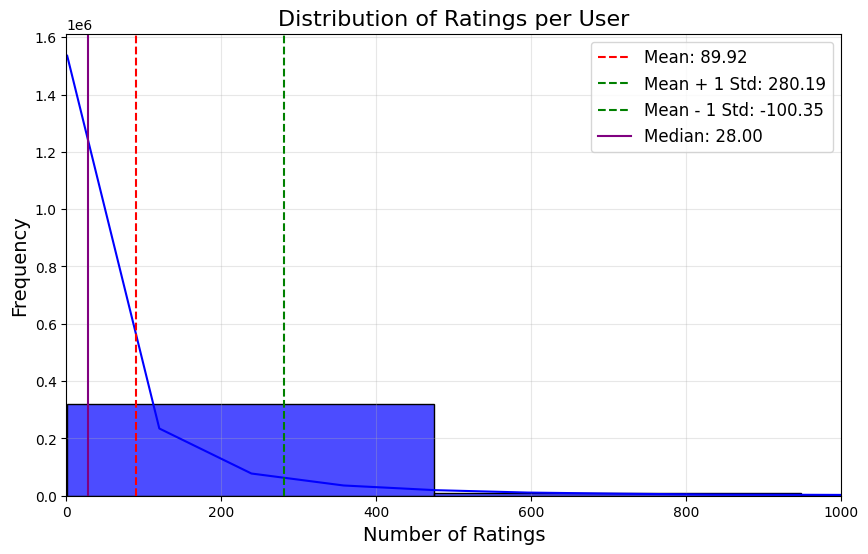

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate statistics
mean_ratings = user_rating_counts_after_filter.mean()
std_ratings = user_rating_counts_after_filter.std()
median_ratings = user_rating_counts_after_filter.median()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(user_rating_counts_after_filter, bins=50, kde=True, color='blue', alpha=0.7)

# Add markers for mean, std, and median
plt.axvline(mean_ratings, color='red', linestyle='--', label=f'Mean: {mean_ratings:.2f}')
plt.axvline(mean_ratings + std_ratings, color='green', linestyle='--', label=f'Mean + 1 Std: {mean_ratings + std_ratings:.2f}')
plt.axvline(mean_ratings - std_ratings, color='green', linestyle='--', label=f'Mean - 1 Std: {mean_ratings - std_ratings:.2f}')
plt.axvline(median_ratings, color='purple', linestyle='-', label=f'Median: {median_ratings:.2f}')

# Add labels and legend
plt.title('Distribution of Ratings per User', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=14)
plt.xlim(0, 1000)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.show()

In [ ]:
my_data

rating_map = {
    '½': 0.5,
    '★': 1,
    '★½': 1.5,
    '★★': 2,
    '★★½': 2.5,
    '★★★': 3,
    '★★★½': 3.5,
    '★★★★': 4,
    '★★★★½': 4.5,
    '★★★★★': 5
}
my_data['rating_num'] = my_data['rating'].map(rating_map)
my_data = my_data.dropna(subset=["movieId"])
my_data = my_data.drop(columns=["rating"])

my_data

,name,genres,avg_user_rating,movieId,rating_num
27,poor-things-2023,"Romance, Science Fiction, Comedy",4.0,286783.0,4.5
30,oppenheimer-2023,"History, Drama",4.2,287699.0,4.5
31,barbie,"Comedy, Adventure",3.8,288513.0,3.5
32,spider-man-across-the-spider-verse,"Animation, Adventure, Science Fiction, Action",4.4,286897.0,5.0
33,asteroid-city,"Comedy, Drama",3.5,287633.0,3.5
...,...,...,...,...,...
464,grease,"Comedy, Romance",3.5,1380.0,3.0
465,star-wars,"Adventure, Action, Science Fiction",4.2,260.0,4.0
466,rocky,Drama,4.1,1954.0,3.0
467,the-exorcist,Horror,4.0,1997.0,4.0


# brb
# min mick


kernel matrix factorization
5000 training iterations,
50 latent factors,
L2 regularization with a weight of 0.005,
A learning rate of 0.01.